In [89]:
# import the necessary packages
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import imutils
from imutils import contours
from imutils.perspective import four_point_transform
from pathlib import Path


def resizeSquareRespectAcpectRatio(img, size, interpolation):
    """
    resizeSquareRespectAcpectRatio
    - resize the picture with respect to image aspect ratio - COOL STUFF

    :param image: image of display from cv2.read
    :param size: size of one site (squared)
    :param interpolation: interpolation for resize function in cv2

    :return resized_image: resized image after resizing
    """

    h, w = img.shape[:2]

    # control dimension, c = None --> binary picture, else colored picture
    if len(img.shape) < 3:
        c = None
    else:
        c = 3
        img.shape[2]

    # if squared --> return squared, else find site with bigger length
    if h == w:
        return cv2.resize(img, (size, size), interpolation)
    if h > w:
        dif = h
    else:
        dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)

    # create mask and insert picture to the center
    if c is None:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)


def myPerspectiveTransformation(image):
    """
    myPerspectiveTransformation
    - do perspective tranformation

    :param image: image of display from blurr

    :return perspective_transformed_image: image after perspective tranform
    """
    # to gray
    out_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # erode
    out_image = cv2.erode(out_image, None, iterations=3)

    """
    # adaptive treshold - avesome thing
    out_image = cv2.adaptiveThreshold(
        out_image, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 115, 11)

    plt.imshow(out_image)
    plt.title('after treshold picture')
    plt.show()
    """

    # canny detection
    out_image = cv2.Canny(out_image, 60, 200)

    plt.imshow(out_image)
    plt.title('canny picture')
    plt.show()

    # dilatate - more amount of information
    out_image = cv2.dilate(out_image, None, iterations=3)

    plt.imshow(out_image)
    plt.title('dilatete canny picture')
    plt.show()
    # find contours in the edge map, then sort them by their
    # size in descending order
    cnts = cv2.findContours(
        out_image, cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
        )
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    # cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    displayCnt = None
    # loop over the contours
    for c in cnts:
        # approximate the contour
        # count perimeter for closed shapes (for us = display)
        peri = cv2.arcLength(c, True)
        # find rectangle for closed shapes
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        # if the contour has four vertices, then we have found display

        if len(approx) == 4:
            displayCnt = approx
            break

    if displayCnt is None:
        # do nothing --> input = output
        perspect_image = image
        print("Couldn't find display edges")

    elif cv2.contourArea(displayCnt) < 0.1*(out_image.shape[0]*out_image.shape[1]):
        perspect_image = image
        print("Edge area is too small")
    else:
        # extract the display, apply a perspective transform
        # to it
        perspect_image = four_point_transform(image, displayCnt.reshape(4, 2))
        print("OK")
    return perspect_image


def preprocess(image, image_size):
    """
    Preprocess
    pre-process the image by to adaptive_treshold, perspectiv_transform,
    erode, diletate, resize

    :param image: image of display from cv2.read

    :return out_image: output image after preprocessing
    """

    # blurr
    #blurred = cv2.GaussianBlur(image, (5, 5), 1)

    # perspective transformation
    out_img = myPerspectiveTransformation(image)

    # resize it
    out_img = resizeSquareRespectAcpectRatio(
        out_img,
        image_size,
        cv2.INTER_AREA
        )

    return out_img

In [90]:
# path to TF2_OD_BRE
main_dir_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('test_preprocessing.ipynb'))))

# path to DIPLOMKA
diplomka_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('test_preprocessing.ipynb')))))
print(diplomka_path)

IMG_SIZE = 224

c:\Users\marti\Disk Google\DIPLOMKA


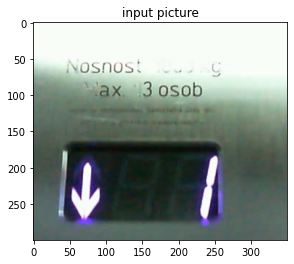

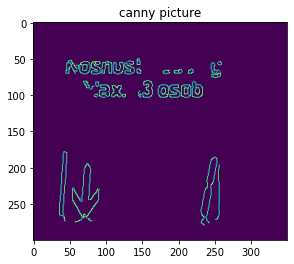

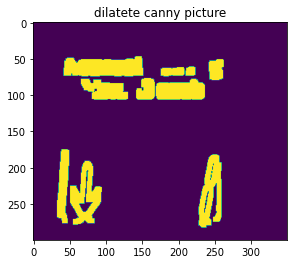

Edge area is too small


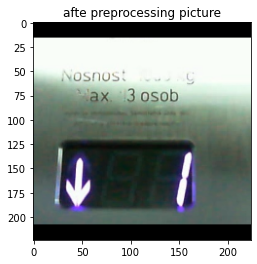

In [91]:
# path to image
img_path = os.path.join(
    diplomka_path,
    r'DATA\DISPLAY_IMAGES\images_classes_from_camera\A4\1',
    os.path.basename("display142.jpg"))

image = cv2.imread(img_path)

plt.imshow(image)
plt.title('input picture')
plt.show()

# preprocess the image file
new_image = preprocess(image, IMG_SIZE)

plt.imshow(new_image)
plt.title('afte preprocessing picture')
plt.show()





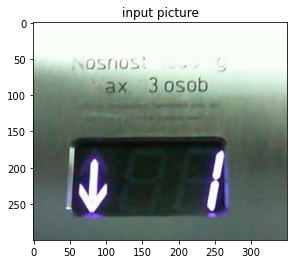

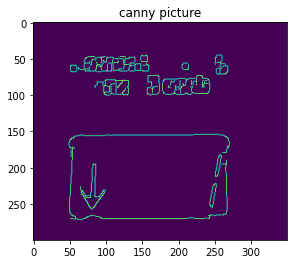

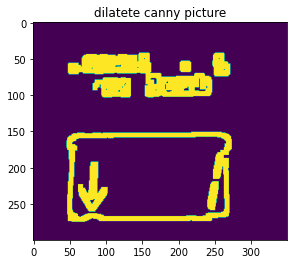

OK


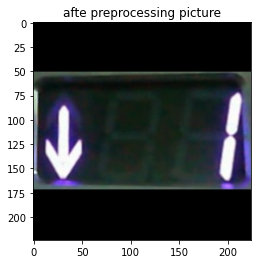

In [71]:
# path to image
img_path = os.path.join(
    diplomka_path,
    r'DATA\DISPLAY_IMAGES\images_classes_from_camera\A4\1',
    os.path.basename("display167.jpg"))

image = cv2.imread(img_path)

plt.imshow(image)
plt.title('input picture')
plt.show()

# preprocess the image file
new_image = preprocess(image, IMG_SIZE)

plt.imshow(new_image)
plt.title('afte preprocessing picture')
plt.show()

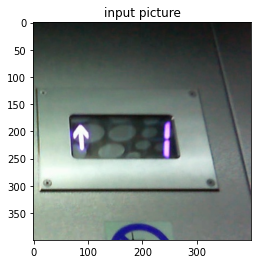

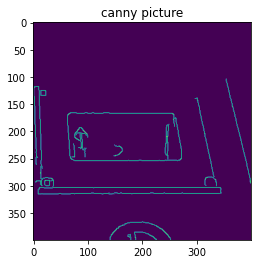

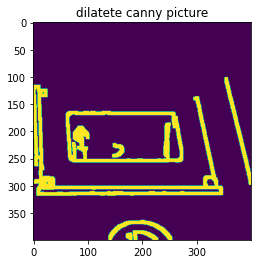

OK


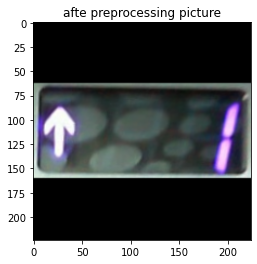

In [72]:
# path to image
img_path = os.path.join(
    diplomka_path,
    r'DATA\DISPLAY_IMAGES\images_classes_from_camera\A1\1',
    os.path.basename("display2458.jpg"))

image = cv2.imread(img_path)

plt.imshow(image)
plt.title('input picture')
plt.show()

# preprocess the image file
new_image = preprocess(image, IMG_SIZE)

plt.imshow(new_image)
plt.title('afte preprocessing picture')
plt.show()

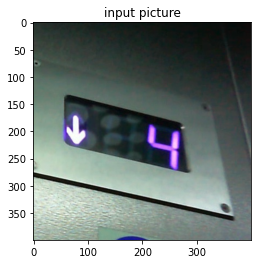

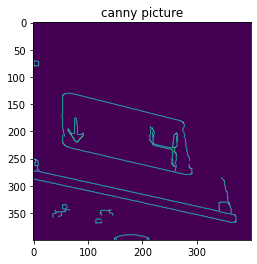

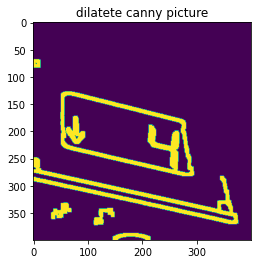

OK


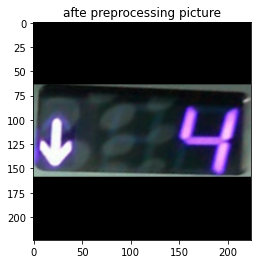

In [73]:
# path to image
img_path = os.path.join(
    diplomka_path,
    r'DATA\DISPLAY_IMAGES\images_classes_from_camera\A1\4',
    os.path.basename("display928.jpg"))

image = cv2.imread(img_path)

plt.imshow(image)
plt.title('input picture')
plt.show()

# preprocess the image file
new_image = preprocess(image, IMG_SIZE)

plt.imshow(new_image)
plt.title('afte preprocessing picture')
plt.show()